In [782]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("🌫🛸")

🌫🛸


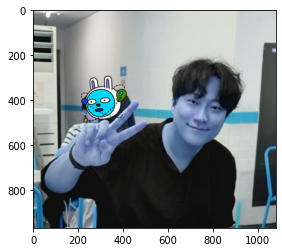

In [783]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/ed.png'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
# img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

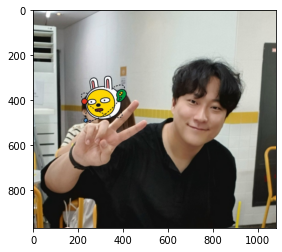

In [784]:
# plt.imshow 이전에 RGB 이미지로 바꾸기.  BGR에 맞게.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [785]:
import dlib
detector_hog = dlib.get_frontal_face_detector()
print("ok")
#dlib으로부터 detector 객체 가져옴.

ok


In [786]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb,1)   #- (image, num of img pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(613, 365) (835, 588)]]


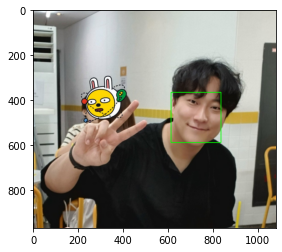

In [787]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [788]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print('ok')

ok


In [789]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


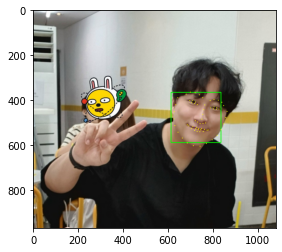

In [790]:
#랜드마크 찍기
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


In [791]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0] #코
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    

(x,y) : (750,373)
(w,h) : (223,223)


(223, 223, 3)


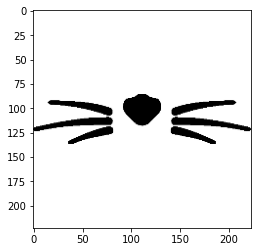

In [792]:
#스티커 이미지 로드
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/mustac.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker,(w,h))
plt.imshow(img_sticker)
plt.show
print (img_sticker.shape)

In [802]:
#스티커 좌표 (left_top기준으로)
refined_x = x - w // 2  # left
refined_y = y  # top
print ('(refined_x,refined_y) : (%d,%d)'%(refined_x, refined_y))

(refined_x,refined_y) : (639,373)


In [803]:
#스티커 위치 정하기
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

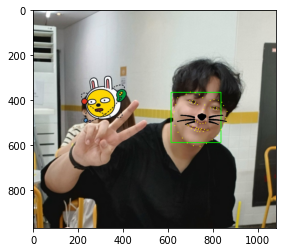

In [804]:
#스티커 붙이기
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

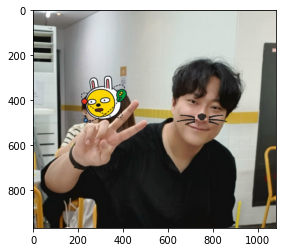

In [805]:
#랜드마크와 프레임 삭제, 투명도 적용
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area,0.5,np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8),0.5,0)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()


-1차 시도 정리-
처음에는 무조건 수염을 붙이겠다는 생각에 코의 랜드마크만을 이용해서 붙였다.
하지만 이렇게 되면 얼굴이 반듯해야 수염이 평행하게 붙는다.

<2차 시도>
목적: 얼굴이 비스듬한 이미지에 수염 붙이기


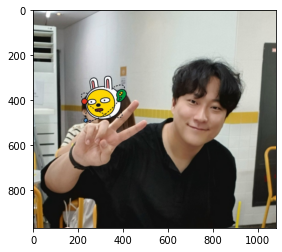

convert color
rectangles[[(613, 365) (835, 588)]]


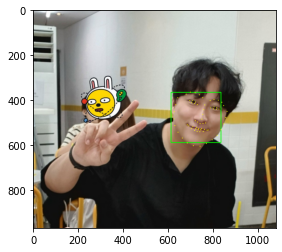

얼굴인식과 랜드마크


In [816]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib
import math

my_image_path2 = os.getenv('HOME')+'/aiffel/camera_sticker/images/ed.png'
img_bgr2 = cv2.imread(my_image_path2)
img_show2 = img_bgr2.copy()  

img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
dlib_rects2 = detector_hog(img_rgb2,1)   #- (image, num of img pyramid
plt.imshow(img_rgb2)
plt.show()
print('convert color')

detector_hog = dlib.get_frontal_face_detector()
print(dlib_rects2)   # 찾은 얼굴영역 좌표

for dlib_rect2 in dlib_rects2:
    l = dlib_rect2.left()
    t = dlib_rect2.top()
    r = dlib_rect2.right()
    b = dlib_rect2.bottom()

    cv2.rectangle(img_show2, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)


img_show_rgb2 =  cv2.cvtColor(img_show2, cv2.COLOR_BGR2RGB)
model_path2 = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path2)

list_landmarks2 = []

for dlib_rect in dlib_rects2:
    points = landmark_predictor(img_rgb2, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks2.append(list_points)
        
#랜드마크 찍기
for landmark2 in list_landmarks2:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show2, point, 2, (0, 255, 255), -1)
            
img_show_rgb2 = cv2.cvtColor(img_show2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb2)
plt.show()
print('얼굴인식과 랜드마크')



In [817]:
for dlib_rect2, landmark2 in zip(dlib_rects2, list_landmarks2):
    x2 = landmark[30][0] - dlib_rect2.width()//2
    y2 = landmark[30][1] - dlib_rect2.width()//2
#     x2 = (landmark[2][0]+landmark[36][0]+landmark[48][0]+landmark[30][0])//4 
#     y2 = (landmark[2][1]+landmark[36][1]+landmark[48][1]+landmark[30][1])//4
    w2 = dlib_rect2.width()
    h2 = dlib_rect2.width()
#     w = int(math.sqrt((x-landmark[36][0])**2 + (landmark[30][1]-landmark[36][1])**2)*2)
#     h = int(math.sqrt((landmark[48][1]-landmark[2][1])**2 + (landmark[48][0]-landmark[2][0])**2)*2)

    print ('(x2,y2) : (%d,%d)'%(x2,y2))
    print ('(w2,h2) : (%d,%d)'%(w2,h2))
    

(x2,y2) : (639,373)
(w2,h2) : (223,223)


(223, 223, 3)


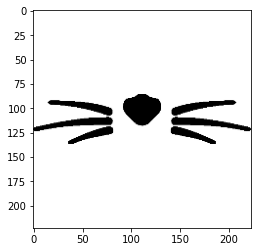

In [799]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/mustac.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker,(w2,h2))
plt.imshow(img_sticker)
plt.show
print (img_sticker.shape)


In [800]:
# #스티커 좌표 (left_top기준으로)
# # refined_xx = x2 + w2 //2
# # refined_yy = y2 - h2//2

# #스티커 좌표 (left_top기준으로)
# refined_xx = x2 - w2 // 2  # left
# refined_yy = y2  # top

# # refined_xx = 230
# # refined_yy = 557
# print ('(refined_xx,refined_yy) : (%d,%d)'%(refined_xx, refined_yy))

(x,y) : (528,373)


In [820]:
#스티커 위치 정하기
sticker_area2 = img_show2[refined_yy:refined_yy+img_sticker.shape[0], refined_xx:refined_xx+img_sticker.shape[1]]
img_show2[refined_yy:refined_yy+img_sticker.shape[0], refined_x:refined_xx+img_sticker.shape[1]] = np.where(img_sticker==255,sticker_area2,img_sticker).astype(np.uint8)

# 이미지에서 얼굴의 기울기
height, width, channel = img_sticker.shape
ang = math.atan(h/w)/math.pi*180
print("각도:", -round(ang,2))



ValueError: could not broadcast input array from shape (223,223,3) into shape (223,112,3)

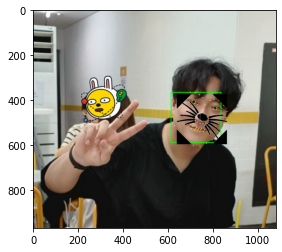

In [706]:
#스티커를 기울기에 맞게 회전시키기
matrix = cv2.getRotationMatrix2D((width/2, height/2), -ang, 1)
img_sticker = cv2.warpAffine(img_sticker, matrix, (width, height))

#스티커 붙이기
plt.imshow(cv2.cvtColor(img_show2, cv2.COLOR_BGR2RGB))
plt.show()

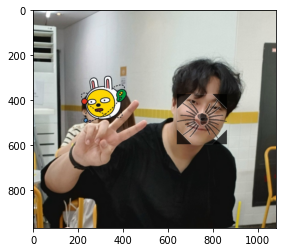

In [662]:
#랜드마크와 프레임 삭제, 투명도 적용
sticker_area2 = img_bgr[refined_yy:refined_yy+img_sticker.shape[0], refined_xx:refined_xx+img_sticker.shape[1]]
img_bgr2[refined_yy:refined_yy+img_sticker.shape[0], refined_xx:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area,0.5,np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8),0.5,0)
plt.imshow(cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB))
plt.show()

-2차 결과:
얼굴 각도에 맞게 스티커도 기울기를 줬는데 결과는 위와 같다.

<3차 시도>

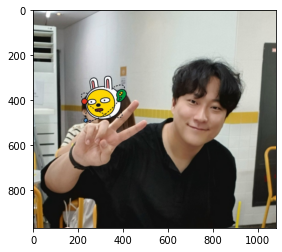

convert color
rectangles[[(613, 365) (835, 588)]]


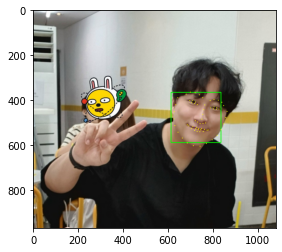

얼굴인식과 랜드마크


In [673]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib
import math

my_image_path3 = os.getenv('HOME')+'/aiffel/camera_sticker/images/ed.png'
img_bgr3 = cv2.imread(my_image_path3)
img_show3 = img_bgr3.copy()  

img_rgb3 = cv2.cvtColor(img_bgr3,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb3)
plt.show()
print('convert color')

detector_hog = dlib.get_frontal_face_detector()
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show3, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)


img_show_rgb3=  cv2.cvtColor(img_show3, cv2.COLOR_BGR2RGB)
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks3= []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb2, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks3.append(list_points)
        
#랜드마크 찍기
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show3, point, 2, (0, 255, 255), -1)
            
img_show_rgb3 = cv2.cvtColor(img_show3, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb3)
plt.show()
print('얼굴인식과 랜드마크')


In [824]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x3 = (landmark[2][0]+landmark[36][0]+landmark[48][0]+landmark[30][0])//4 
    y3 = (landmark[2][1]+landmark[36][1]+landmark[48][1]+landmark[30][1])//4
    w3 = dlib_rect.width()
    h3 = dlib_rect.width()
#     w = int(math.sqrt((x-landmark[36][0])**2 + (landmark[30][1]-landmark[36][1])**2)*2)
#     h = int(math.sqrt((landmark[48][1]-landmark[2][1])**2 + (landmark[48][0]-landmark[2][0])**2)*2)
    print ('(x,y) : (%d,%d)'%(x3,y3))
    print ('(w,h) : (%d,%d)'%(w3,h3))

(x,y) : (689,461)
(w,h) : (223,223)


(223, 223, 3)


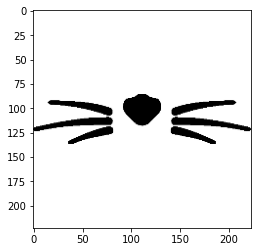

In [779]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/mustac.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker,(w3,h3))
plt.imshow(img_sticker)
plt.show
print (img_sticker.shape)

In [826]:

#스티커 좌표 (left_top기준으로)
refined_xxx = x3 - w3 // 2  # left
refined_yyy = y3  # top

# # refined_xx = 230
# # refined_yy = 557
print ('(refined_xxx,refined_yyy) : (%d,%d)'%(refined_xxx, refined_yyy))

(refined_xxx,refined_yyy) : (578,461)


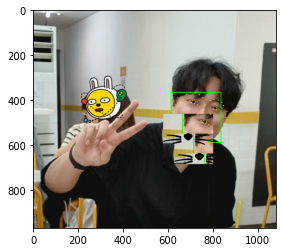

In [830]:
#스티커 위치 정하기
sticker_area3 = img_show3[refined_yyy:refined_yyy+img_sticker.shape[0], refined_xxx:refined_xxx+img_sticker.shape[1]]
img_show3[refined_yyy:refined_yyy+img_sticker.shape[0], refined_xxx:refined_xxx+img_sticker.shape[1]] = np.where(img_sticker==255,sticker_area2,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show3, cv2.COLOR_BGR2RGB))
plt.show()

3차 시도 정리:
랜드마크의 4포인트의 중간 벡터값을 이용해 얼굴이 기울어도 스티커도 같이 기울지 않을까해서 시도해봤으나, 꼬인 상태로 실패됨.